In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# getting data
apr = xr.open_dataset('/home/sbeale/WRF_climatologies/apr_tmin_regrid.nc')
apr_wrf = xr.open_dataset('/home/sbeale/WRF_climatologies/tmin_05_regrid_coarse.nc')
apr_clim = xr.open_dataset('/home/sbeale/PRISM_WorldClim/tmin_05_PRISM_WorldClim.nc')

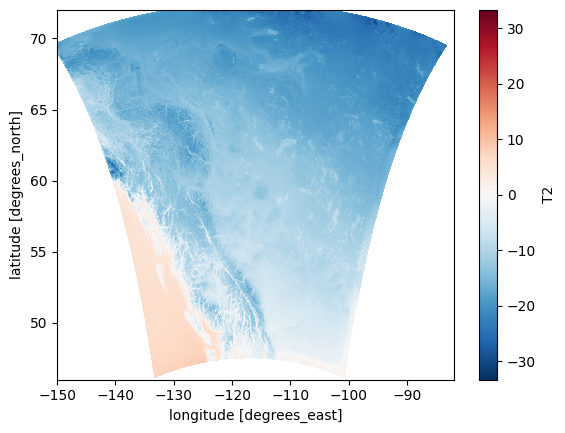

In [23]:
apr.T2.plot()

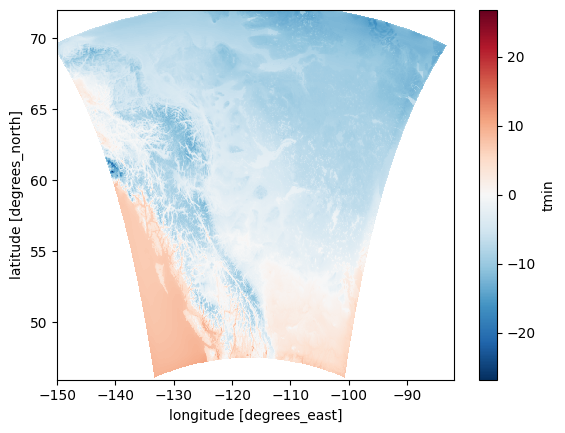

In [24]:
apr_wrf.tmin.plot()

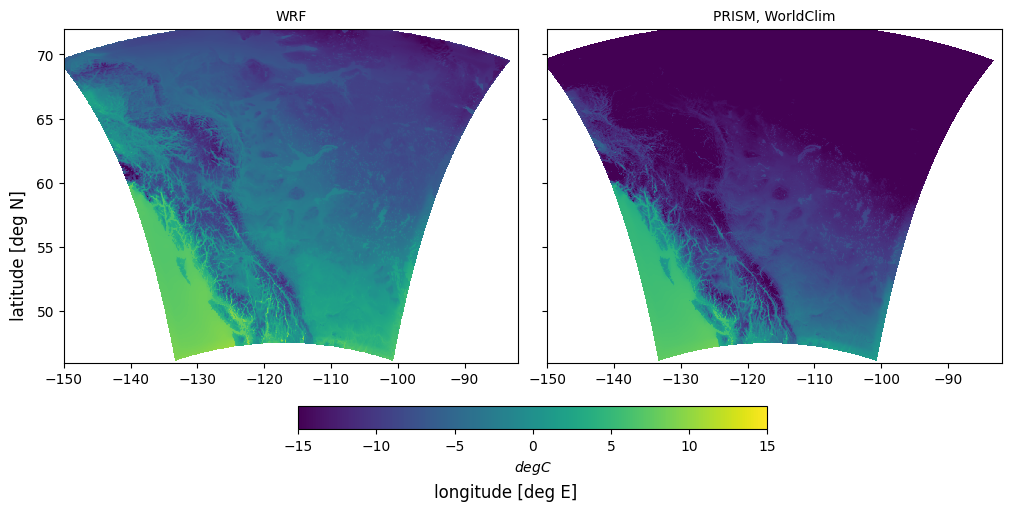

In [25]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(apr_wrf.longitude, apr_wrf.latitude, apr_wrf.tmin, cmap='viridis', vmin=-20, vmax=15, label=r'$m$')
ax[0].set_title(f'WRF', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(apr.longitude, apr.latitude, apr.T2, cmap='viridis', vmin=-20, vmax=15, label=r'$m$')
ax[1].set_title(f'PRISM, WorldClim', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [15]:
def reshape_split(image: np.ndarray, kernel_size: tuple):
    
    height, width = image.shape
    tile_height, tile_width = kernel_size
    
    tiled_array = image.reshape(height // tile_height, 
                                tile_height, 
                                width // tile_width,
                                tile_width)
    
    tiled_array = tiled_array.swapaxes(1, 2)
    return tiled_array

In [20]:
x = np.array(apr_clim.tmin)

In [21]:
x.shape

(3121, 8161)

In [18]:
reshape_split(x, (50, 50))

ValueError: cannot reshape array of size 25470481 into shape (62,50,163,50)

In [9]:
dem = xr.open_dataset('/home/sbeale/PRISM_BC_AK_250m_NWT.nc')

In [10]:
dem

<xarray.Dataset> Size: 102MB
Dimensions:    (longitude: 8161, latitude: 3121)
Coordinates:
  * longitude  (longitude) float64 65kB -150.0 -150.0 -150.0 ... -82.01 -82.0
  * latitude   (latitude) float64 25kB 72.0 71.99 71.98 ... 46.02 46.01 46.0
Data variables:
    dem        (latitude, longitude) float32 102MB ...
    crs        int32 4B ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R packages ncdf4 and terra (version 1.7-78)
    date:         2024-05-30 12:59:46

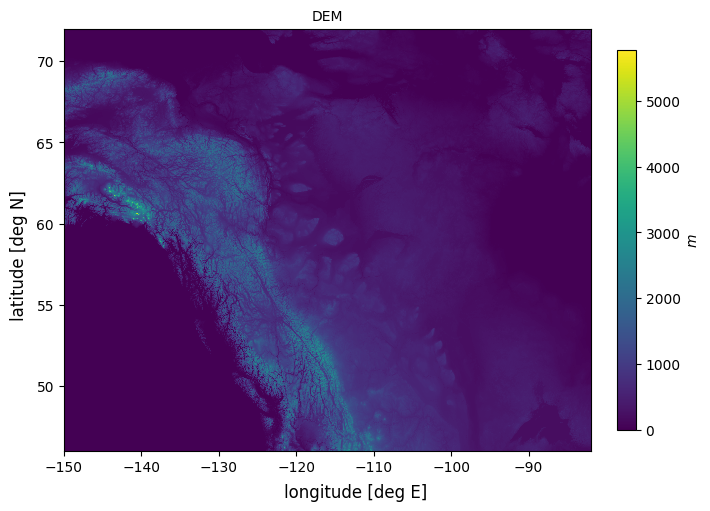

In [11]:
fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax.pcolormesh(dem.longitude, dem.latitude, dem.dem, cmap='viridis', vmin=-2, vmax=5777, label=r'$m$')
ax.set_title(f'DEM', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.9, aspect=20, location='right', ax=ax, label=r'$m$')